# Goals
1. Implement PD control on a nonlinear pendulum
2. Implement feedback control on 2 link manipulator.
3. Model feedback control on a cable robot


# **Example 1: Nonlinear Pendulum**

Recall the dynamics of a nonlinear pendulum:
\begin{equation}
I\ddot \theta + b\dot \theta + mgL \sin\theta = u
\end{equation}

From the above equation we get:
\begin{equation}
\ddot \theta  = \frac{1}{I}(u - b\dot \theta - mgL \sin\theta)
\end{equation}
The PD control with gravity compensation for this system is as follows:
\begin{equation}
u = K_p \tilde{\theta} + K_d \dot{\tilde{\theta}} + b \dot{\theta} + mgl\sin{\theta}
\end{equation}

## **Point to point motion**

In [1]:
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *

In [2]:
system_params = {'m':1,     # mass of the pendulum bob
                 'g':9.81,  # Gravitational acceleration
                 'L':0.2,   # Length of pendulum beam 
                 'I':0.1,   # Inertia of actuator 
                 'b':0.1,   # Actuator viscous friction (damping) 
                 }

In [3]:
def desired_state():
  x = 3
  dx = 0
  ddx = 0
  return x, dx, ddx

In [5]:
'''
x: state vector
t: array of time 
control: control function
system_params: parameters of a system
control_params: parameters of a control (for example, the gains)
'''
def sys_ode(x, t):
    m, g, L = system_params['m'], system_params['g'], system_params['L']
    I = system_params['I']
    b = system_params['b']

    theta, dtheta = x[0], x[1]

    u = pd_control(x, t, controler_params)

    ddtheta = (u - b*dtheta - m*g*L*np.sin(theta)) / I 
    dx = dtheta, ddtheta

    return dx

In [6]:
def pd_control(x, t, c_params):
    m, g, L, I, b = system_params['m'], system_params['g'], system_params['L'], system_params['I'], system_params['b']

    theta, dtheta = x[0],x[1]
    
    theta_d, dtheta_d, ddtheta_d = desired_state()

    kp = c_params['kp']
    kd = c_params['kd']
    
    u = kp*(theta_d-theta) + kd*(dtheta_d-dtheta) + b*dtheta + m*g*L*sin(theta)
    return u

## **System Response**

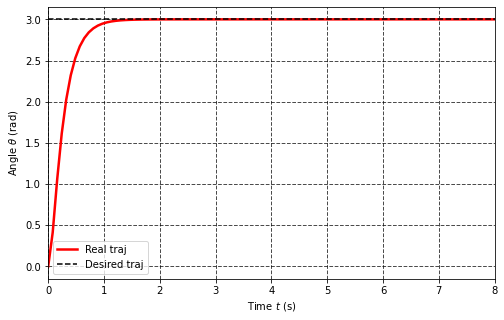

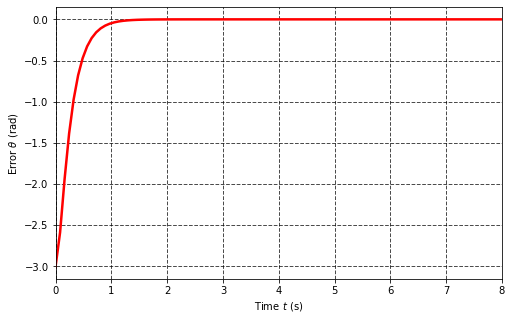

In [ ]:
t0 = 0 
tf = 8

freq = 50
dT = 1/freq

y0 = 0.
x0 = [y0, 0] 

N = int(100) 
t = np.linspace(t0, tf, N) 
# t = np.arange(0.0,tf,dT)

controler_params = {}
controler_params['kp'] = 7
controler_params['kd'] = 2
controler_params.update(system_params) 

state_prev = x0
state = []

state = odeint(sys_ode, x0, t)

theta, dtheta = state[:,0], state[:,1]

theta_desired = np.ones(np.size(t))*desired_state()[0]

# response plot
figure(figsize=(8,5)) 
plot(t, theta,'r', linewidth=2.5, label='Real traj')
plot(t, theta_desired, color = 'black', linestyle = '--', label='Desired traj')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlim([t0, tf])

ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
legend(loc='lower left')
show()

# error plot
figure(figsize=(8,5))
plot(t, theta-theta_desired,'r', linewidth=2.5)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlim([t0, tf])

ylabel(r'Error ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

### **Control Input Plot**

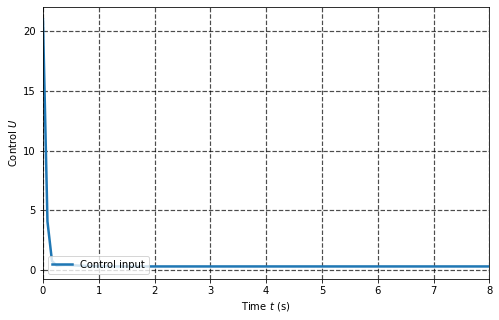

In [ ]:
# control plot
u = pd_control([theta, dtheta], t, controler_params)
figure(figsize=(8,5))
plot(t, u, linewidth=2.5, label='Control input')
grid(color='black', linestyle='--', linewidth=1.2, alpha=0.7)
xlim([t0, tf])

ylabel('Control $U$')
xlabel('Time $t$ (s)')
legend(loc='lower left')
show()

## **Following the desired trajectory**

In [7]:
def trajectory(t):
  x = 2 * sin(t)
  dx = 2 * cos(t)
  ddx = -2 * sin(t)
  return x, dx, ddx

In [8]:
def pd_control(x, t, c_params):
    m, g, L, I, b = system_params['m'], system_params['g'], system_params['L'], system_params['I'], system_params['b']

    theta, dtheta = x[0],x[1]
    
    theta_d, dtheta_d, ddtheta_d = trajectory(t)

    kp = c_params['kp']
    kd = c_params['kd']
    
    u = I * ddtheta_d*0 + kp*(theta_d-theta) + kd*(dtheta_d-dtheta) + b*dtheta + m*g*L*sin(theta)
    return u

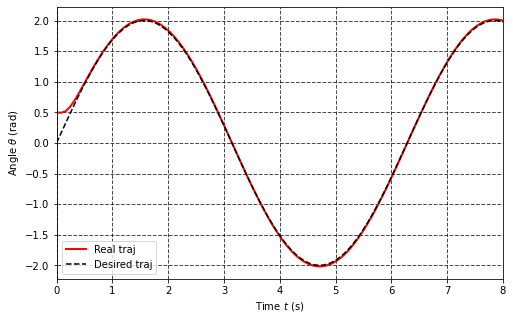

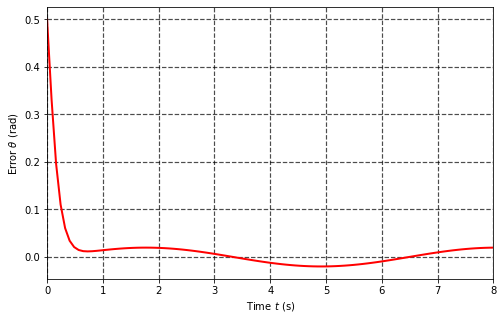

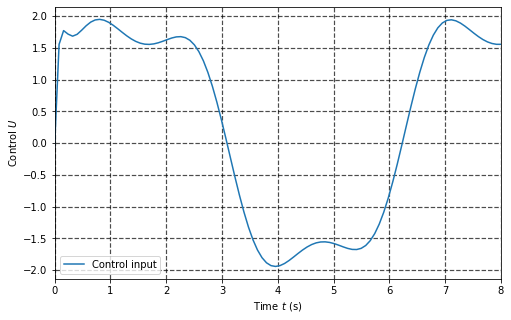

In [14]:
t0 = 0 
tf = 8

freq = 50
dT = 1/freq

y0 = 0.5
x0 = [y0, 0] 

N = int(100) 
t = np.linspace(t0, tf, N) 
# t = np.arange(0.0,tf,dT)

controler_params = {}
controler_params['kp'] = 10
controler_params['kd'] = 2
controler_params.update(system_params) 

state_prev = x0
state = []

state = odeint(sys_ode, x0, t)

theta, dtheta = state[:,0], state[:,1]

theta_desired = trajectory(t)[0]

# trajectory plot
figure(figsize=(8,5)) 
plot(t, theta,'r', linewidth=2.0, label='Real traj')
plot(t, theta_desired, color = 'black', linestyle = '--', label='Desired traj')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
xlim([t0, tf])

ylabel(r'Angle ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
legend(loc='lower left')
show()

# error plot
figure(figsize=(8,5))
plot(t, theta-theta_desired,'r', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.2, alpha = 0.7)
xlim([t0, tf])

ylabel(r'Error ${\theta}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

# control plot
u = pd_control([theta, dtheta], t, controler_params)
figure(figsize=(8,5))
plot(t, u, label='Control input')
grid(color='black', linestyle='--', linewidth=1.2, alpha=0.7)
xlim([t0, tf])

ylabel('Control $U$')
xlabel('Time $t$ (s)')
legend(loc='lower left')
show()

We see that the control makes the system follow the trajectory. However, the error plot doesn't converge exactly to 0. It has some oscillations. What can we do to fix it?

**Exercise:**
1. Implement this control :

\begin{equation}
u = I \ddot{\theta}_d + K_p \tilde{\theta} + K_d \dot{\tilde{\theta}} + b \dot{\theta} + mgl\sin{\theta}
\end{equation}

2. What is the error dynamics? 
3. Plot the state response.

# **Dynamics of Manipulators**

>Equation of motion for most mechanical systems may be written in following form:
>\begin{equation}
\mathbf{Q} - \mathbf{Q}_d = \mathbf{D}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{C}(\mathbf{q},\dot{\mathbf{q}})\dot{\mathbf{q}} + \mathbf{g}(\mathbf{q})  = \mathbf{D}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{h}(\mathbf{q},\dot{\mathbf{q}})
\end{equation}
>
>where:
>* $\mathbf{Q} \in \mathbb{R}^n $ - generalized forces corresponding to generilized coordinates
>* $\mathbf{Q}_d \in \mathbb{R}^n $ - generalized disippative forces (for instance friction)
>* $\mathbf{q} \in \mathbb{R}^{n}$ - vector of generilized coordinates
>* $\mathbf{D} \in \mathbb{R}^{n \times n}$ - positive definite symmetric inertia matrix 
>* $\mathbf{C} \in \mathbb{R}^{n \times n}$ - describe 'coefficients' of centrifugal and Coriolis forces
>* $\mathbf{g} \in \mathbb{R}^{n}$ - describes effect of gravity and other position depending forces
>* $\mathbf{h} \in \mathbb{R}^n $ - combined effect of $\mathbf{g}$ and $\mathbf{C}$

#### **Lagrange-Euler Equations**

In order to find the EoM we will use the Lagrange-Euler equations:
\begin{equation}
{\frac  {d}{dt}}\left({\frac  {\partial \mathcal{L}}{\partial {\dot{\mathbf{q}}}_{i}}}\right)-{\frac  {\partial \mathcal{L}}{\partial \mathbf{q}_{i}}}=\mathbf{Q}_i -\frac{\partial \mathcal{R}}{\partial \mathbf{\dot{q}}_i},\quad i = 1,2,\dots, n
\end{equation}

>where:
>* $\mathcal{L}(\mathbf{q},\dot{\mathbf{q}}) \triangleq E_K - E_\Pi \in \mathbb{R}$ Lagrangian of the system  
>* $\mathcal{R} \in \mathbb{R}$ Rayleigh function  (describes energy dissipation)

# **Example 2: Two-link Manipulator**
For instance let's consider remotely driven rigid 2-DoF manipulator:
<p><img alt="Remote manipulator" height="250" src="https://drive.google.com/uc?id=1nY6dY3jmwtfXuIy0p1ZUXs3TNC0iSqf5" align="center" hspace="50px" vspace="0px"></p>


#### **Energy**
Kinetic and potential energy of this system is equal to:
\begin{equation}
E_K = \frac{1}{2}\sum_{j=1}^{2}  m_j\dot{\mathbf{r}}_j^T\dot{\mathbf{r}}_j  +  J_j \dot{\alpha}^2_i, \quad E_\Pi = \sum_{j=1}^{n}  m_i g y_i  
\end{equation}


Where $\mathbf{r}_j$ is Cartesian coordinates of mass $m_j$ calculated via forward kinematics as:

\begin{equation}
\mathbf{r}_1
=
\begin{bmatrix}
x_1 \\
y_1
\end{bmatrix}
=
\begin{bmatrix}
l_1 \cos \alpha_1 \\
l_1 \sin \alpha_1
\end{bmatrix}, \quad
\mathbf{r}_2
=
\begin{bmatrix}
x_2 \\
y_2
\end{bmatrix}
=
\begin{bmatrix}
l_1 \cos \alpha_1 + l_2 \cos \alpha_2 \\
l_1 \sin \alpha_1 + l_2 \sin \alpha_2
\end{bmatrix}
\end{equation}


Apart from kinetic and potential energy there are two dissipative elements in this system, namely "dampers" with coefficients $b_1, b_2$ (viscous friction), their dissipation function is given as:
\begin{equation}
\mathcal{R} = \frac{1}{2}\sum_{j=1}^{n}  b_j \dot{\alpha}^2_j
\end{equation}


Defining generalized coordinates as $\mathbf{q} = [\alpha_1,\alpha_2]^T$ and forces as $\mathbf{Q} = [u_1,u_2]^T$ one can apply Lagrange formalism to obtain equations of motion as:

\begin{equation}
\begin{cases} 
I_1\ddot{\alpha}_1 + l_1^2 (m_1 + m_2) \ddot{\alpha}_1 + l_1 l_2 m_2 \cos(\alpha_1 - \alpha_2)\ddot{\alpha}_2 + 
l_1 l_2 m_2 \sin(\alpha_1 - \alpha_2)\dot{\alpha}^2_2
+l_1 m_1 g \cos \alpha_1 + l_1 m_2 g \cos \alpha_2 + b_1 \dot{\alpha}_1 =u_1 \\
l_1 l_2 m_2 \cos(\alpha_1 - \alpha_2)\ddot{\alpha}_1 + I_2 \ddot{\alpha} + l_2^2 m_2 \ddot{\alpha}_2 - l_2 m_2 l_1 \sin(\alpha_1 - \alpha_2)\dot{\alpha}^2_1 + l_2 m_2 g \cos \alpha_2+ b_2 \dot{\alpha}_2 = u_2
\end{cases}
\end{equation}

Now we can find the $\mathbf{D}, \mathbf{C}, \mathbf{g}$ to be:

\begin{equation}
\mathbf{D} = 
\begin{bmatrix}
l_1^2 (m_1 + m_2)+ J_1 & l_1 l_2 m_2  \cos(\alpha_1 - \alpha_2)\\
l_1 l_2 m_2 \cos(\alpha_1 - \alpha_2) & l_2^2 m_2+ J_2
\end{bmatrix}, \quad
\mathbf{c} = \begin{bmatrix}
l_1 l_2 m_2 \sin(\alpha_1 - \alpha_2)\dot{\alpha}^2_2 \\
- l_2 m_2 l_1 \sin(\alpha_1 - \alpha_2)\dot{\alpha}^2_1
\end{bmatrix}
,
\quad
\mathbf{g} = \begin{bmatrix}
l_1 m_1 g \cos \alpha_1 + l_1 m_2 g \cos \alpha_1 \\
 l_2 m_2 g \cos \alpha_2
\end{bmatrix},
\quad
\mathbf{Q}_d = 
\begin{bmatrix}
b_1 \dot{\alpha}_1 \\
b_2 \dot{\alpha}_2
\end{bmatrix},
\end{equation}


In [16]:
from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv, pinv, norm

def D(q, params):
    alpha_1, alpha_2 = q
    l, m, J, b, g = params
    
    d11 = (m[0]+m[1]) * l[0]**2  + J[0]
    d12 = m[1]* l[0]* l[1]* cos(alpha_1 - alpha_2)
    d21 = d12
    d22 = m[1] * l[1]**2 + J[1]
    return array([[d11,d12],[d21,d22]])

def c_term(q, dq, params):
    alpha_1, alpha_2 = q
    dalpha_1, dalpha_2 = dq

    c1 = m[1]* l[0]* l[1]* sin(alpha_1 - alpha_2)* dalpha_2**2
    c2 = -m[1]* l[0]* l[1]* sin(alpha_1 - alpha_2)* dalpha_1**2
    return array([c1, c2])

def g_term(q, params):
    alpha_1, alpha_2 = q

    g1 = (m[0]+m[1])*g*l[0]*cos(alpha_1)
    g2 = m[1]*g*l[1]*cos(alpha_2)
    return array([g1, g2])

def Q_d(q, dq, params):
    
    dalpha_1, dalpha_2 = dq
    Q_d_1 = b[0]*dalpha_1
    Q_d_2 = b[1]*dalpha_2
    return array([Q_d_1, Q_d_2])

def h(q, dq, params):
    return c_term(q, dq, params) + g_term(q, params)


### **Dynamics in State Space Form**
Choosing state as $\mathbf{x} = [\mathbf{x}_1,\mathbf{x}_2]^T= [\mathbf{q},\dot{\mathbf{q}}]^T$ and control as $\mathbf{Q} = [u_1,u_2]^T$ we can easily rewrite equations above as:

\begin{equation}
\dot{\mathbf{x}}
=
\begin{bmatrix}
\dot{\mathbf{x}}_1 \\ 
\dot{\mathbf{x}}_2
\end{bmatrix}
=
\begin{bmatrix}
\dot{\mathbf{q}} \\ 
\ddot{\mathbf{q}}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{x}_2 \\
\mathbf{D}(\mathbf{x}_1)^{-1} \big(\mathbf{u} - \mathbf{Q}_d -  \mathbf{h}(\mathbf{x}_1, \mathbf{x}_2) \big)
\end{bmatrix}
\end{equation}


In [17]:

def sysode(x, t, control, params, control_params):
    q, dq = x[:2], x[2:4]

    D_c = D(q, params)
    h_c = h(q, dq, params)
    Q_d_c = Q_d(q, dq, params)

    # Calculate control
    u = control(x, t, control_params)
    ddq = dot(inv(D_c), u - Q_d_c -  h_c )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)


### **PD Control**
Let us choose the controller to be a simple PD regulator:
\begin{equation}
\mathbf{u} = \mathbf{K}_p\tilde{\mathbf{q}} -  \mathbf{K}_d\dot{{\mathbf{q}}}
\end{equation}

In [18]:
# Manipulator parameters
l = 0.3, 0.3
m = 0.5, 3.0
J = 0.01, 0.01
b = 0.02, 0.02
g = 9.81
params = l, m, J, b, g

In [26]:
def trajectory(t):
  x = cos(2*pi*t), sin(2*pi*t)
  dx = 0, 0
  ddx = 0, 0
  return x, dx ,ddx

In [55]:
def control(x, t, control_params):
    q, dq = x[:2], x[2:4]
    gains = control_params['gains']
    K1, K2 = gains

    q_d = trajectory(t)[0]
    q_e = q_d - q

    Q_d_c = Q_d(q,dq,params)
    h_c=h(q, dq, params)

    u = dot(K1, q_e) + dot(K2, - dq)+Q_d_c+h_c+trajectory(t)[2]
    return u


control_params = {}
Kp = diag([150, 150])
Kd = diag([15, 15])
control_params['gains'] = Kp, Kd


Now we can simulate the system response:

In [56]:
from scipy.integrate import odeint

# Integration
t0 = 0 # Initial time 
tf = 3 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q, dq = sol[:,:2], sol[:,2:4]
alpha1, alpha2 = q[:,0], q[:,1]

alpha1_d, alpha2_d = trajectory(t)[0]

from matplotlib.pyplot import *
plot(t, alpha1,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha2,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha1_d,'r',linestyle = "--", linewidth=2.0, label = 'Joint 1 des')
plot(t, alpha2_d,'b',linestyle = "--", linewidth=2.0, label = 'Joint 2 des')

#hlines(alpha1_d, t0, tf,color = 'black', linestyle = '--', alpha = 0.7, label = 'Joint 1 des')
#hlines(alpha2_d, t0, tf,color = 'black', linestyle = '--', alpha = 0.7, label = 'Joint 2 des')
#
# rid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
#grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

ValueError: operands could not be broadcast together with shapes (2,) (20,) 

**TASK**: Try to implement PD control for the motion along the desired trajectory. You can take $\mathbf{q}_d = [\cos(2\pi t), \sin(2\pi t)]$.

# **Example 3: Planar Cable-Driven Robot**

Let's consider a planar cable-driven robot with three forces applied (gravitation force is not counted). The dynamics of this systemis as follows:

\begin{equation}
\mathbf{M}
\ddot {\mathbf{q}} + \mathbf{g}(\mathbf{q})
=
\mathbf{B} \mathbf{u}
\end{equation}

where
\begin{equation}
\mathbf{M} =
\begin{bmatrix}
m & 0\\
0 & m\\
\end{bmatrix}
\quad
\mathbf{B} =
\begin{bmatrix}
\frac{x_{c1}}{||\mathbf{r}_{c1}||} & \frac{x_{c2}}{||\mathbf{r}_{c2}||} & \frac{x_{c3}}{||\mathbf{r}_{c3}||} \\
\frac{y_{c1}}{||\mathbf{r}_{c1}||} & \frac{y_{c2}}{||\mathbf{r}_{c2}||} & \frac{y_{c3}}{||\mathbf{r}_{c3}||} \\
\end{bmatrix}
\quad
\mathbf{g} = 
\begin{bmatrix}
0 \\ -mg
\end{bmatrix}
\end{equation}

The generalized coordinates $\mathbf{q}=[x \quad y]^T$, the forces are $\mathbf{u}=[\tau_1 \quad \tau_2 \quad \tau_3]^T$.



**Exercise:** Implement PD control for the cable robot. Write the following functions for:
1. Matrices $\mathbf{M}$, $\mathbf{g}$ and $\mathbf{B}$.
2. System dynamics.
3. Control.
\begin{equation}
\mathbf{u} = \mathbf{K}_p\tilde{\mathbf{q}} + \mathbf{K}_d\dot{\tilde{\mathbf{q}}}
\end{equation}
4. Desired trajectory (for point-to-point motion you can put any constant values, for the desired trajectory you may put $\sin$ or $\cos$ functions).

## **Tension preserving using Null Space**

Notably, the control input has negative values, which means that the motor tries to relax the cable. But physically, this is not possible, since we can only stretch the cable. Therefore, we need to make sure that our control maitains positive. The intuitively simple technique implies using Null Space.

\begin{equation}
\mathbf{Q} = \mathbf{B}(\mathbf{q}) \mathbf{u}
\end{equation}

\begin{equation}
\mathbf{u} = \mathbf{B}^+\mathbf{Q}
\end{equation}

Question: Is there anything that we can add and this addition does not change the control? The answer is Null space of $\mathbf{B}$. Indeed, we can modify the control as follows:

\begin{equation}
\mathbf{u} = \mathbf{B}^+\mathbf{Q} + \mathcal{N}(\mathbf{B}) c_0
\end{equation}

where constant $c_0 = \frac{||\mathbf{B}^+\mathbf{Q}||}{||\mathcal{N}(\mathbf{B})||}$.

**Observations:** We can see that the control has changed while the response remained the same. 

In [ ]:
def M(mass):
    return [[mass,0],[0,mass]]

def g(mass):
    g=9.81
    return [[0],[-mass*g]]



In [ ]:
def B_matrix(x,y):
    x = np.array([x,y]).reshape(2,1)
    B = np.zeros((2,3),dtype = np.float32)
    
    c1 = np.array([-1],[0])
    c2 = np.array([1],[1])
    c3 = np.array([0],[-1])
    rc1 = np.norm(c1 - x)
    rc2 = np.norm(c2 - x)
    rc3 = np.norm(c3 - x)
    
    B[0,0] = (c1[0] - x[0]) / rc1
    B[0,1] = (c2[0] - x[0]) / rc2
    B[0,2] = (c3[0] - x[0]) / rc3
    B[1,0] = (c1[0] - x[1]) / rc1
    B[1,1] = (c2[0] - x[1]) / rc2
    B[1,2] = (c3[0] - x[1]) / rc3
    return B